# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: ______
*Métodos computacionales 2025-I*

---

In [82]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import CubicHermiteSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request
from scipy.optimize import newton

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [9]:
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

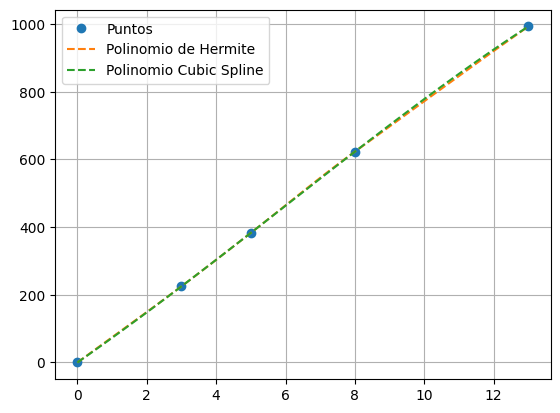

In [10]:
t_interp = np.linspace(min(tiempos), max(tiempos), 100)
Pol_Hermite = CubicHermiteSpline(tiempos, distancias, velocidades)
Pol_interp_H = Pol_Hermite(t_interp)
Pol_CubicSpline = CubicSpline(tiempos, distancias)
Pol_interp_CS = Pol_CubicSpline(t_interp)

plt.plot(tiempos, distancias, 'o', label = 'Puntos')
plt.plot(t_interp, Pol_interp_H, '--', label = 'Polinomio de Hermite')
plt.plot(t_interp, Pol_interp_CS, '--',  label = 'Polinomio Cubic Spline')
plt.legend()
plt.grid()

In [13]:
#Veamos qué distancia tiene el automovil en  t = 10 s usando los dos métodos
t_10_H = Pol_Hermite(10)
t_10_CS = Pol_CubicSpline(10)
print(f'Según el polinomio de Hermite en t = 10 segundos la distancia es: {t_10_H} metros')
print(f'Según el polinomio Cubic Spline en t = 10 segundos la distancia es: {t_10_CS} metros')

Según el polinomio de Hermite en t = 10 segundos la distancia es: 771.96 metros
Según el polinomio Cubic Spline en t = 10 segundos la distancia es: 778.4190647482014 metros


In [20]:
#Veamos la velocidad máxima predicha para el automóvil en cada caso
#Hagamos un polinomio interpolador con las velocidades

Pol_CS_V = CubicSpline(tiempos, velocidades)
Vel_interp_CS = Pol_CS_V(t_interp)
derivada = Pol_CS_V.derivative()(tiempos) #derivative sirve cuando los puntos no están equidistantes entre sí
Pol_Hermite_V = CubicHermiteSpline(tiempos, velocidades, derivada)
Vel_interp_H = Pol_Hermite_V(t_interp)

print(f'La velocidad máxima según Hermite es {max(Vel_interp_H)} m/s')
print(f'La velocidad máxima según Cubic Spline es {max(Vel_interp_CS)} m/s')

La velocidad máxima según Hermite es 79.99880391414267 m/s
La velocidad máxima según Cubic Spline es 79.99880391414267 m/s


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

In [25]:
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²

In [24]:

def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
      x: array de puntos x
      y: array de puntos y
      i: indice del primer punto
      j: indice del ultimo punto
    Salidas:
      a: coeficiente diferencia dividida (i,j)
    '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
      x: array de puntos x
      y: array de puntos y
    Salidas:
      coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  '''
  Calcula el polinomio de Newton a partir de los puntos (x, y)
  Entradas:
    x: array de puntos x
    y: array de puntos y
  Salidas:
    P: polinomio de Newton como una función de x
  '''
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P

Cuando la altitud = 5000, al gravedad tiene un valor de 9.794654101562498
Cuando la altitud = 42000, al gravedad tiene un valor de 9.681858665
Cuando la altitud = 90000, al gravedad tiene un valor de 9.538415625


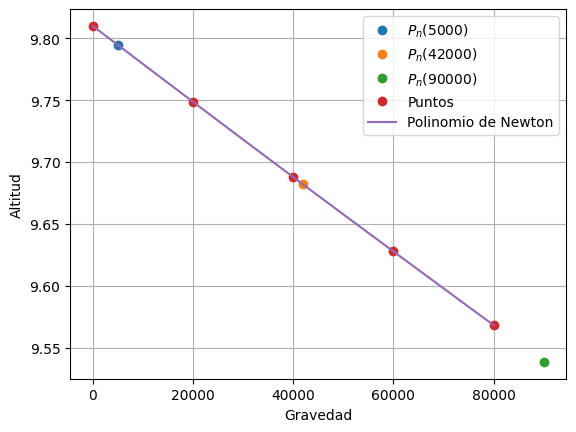

In [40]:
P_n = Polinomio_Newton(y, g)

y_interp = np.linspace(min(y), max(y), 100)
g_interp = [P_n(y_i) for y_i in y_interp]
altitud = [5000, 42000, 90000]
for y_ in altitud:
  G_n = Polinomio_Newton(y,g)
  G_n_eval = G_n(y_)
  print(f'Cuando la altitud = {y_}, al gravedad tiene un valor de {G_n_eval}')
  plt.plot(y_, G_n_eval,'o',  label = f'$P_n({y_})$')

plt.plot(y, g, 'o' ,label = 'Puntos')
plt.plot(y_interp, g_interp,label = 'Polinomio de Newton')
plt.xlabel('Gravedad')
plt.ylabel('Altitud')
plt.legend()
plt.grid()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



In [39]:
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

<ipython-input-24-2465633046>:48: RuntimeWarning: overflow encountered in scalar multiply
  producto *= (x_val - x[i - 1])


Cuando la temperatura es 250 K, la densidad del aire es igual a 1.3957111986308655
Cuando la temperatura es 800 K, la densidad del aire es igual a 0.5223684564860196
Cuando la temperatura es 3000 K, la densidad del aire es igual a -16143.801912028579


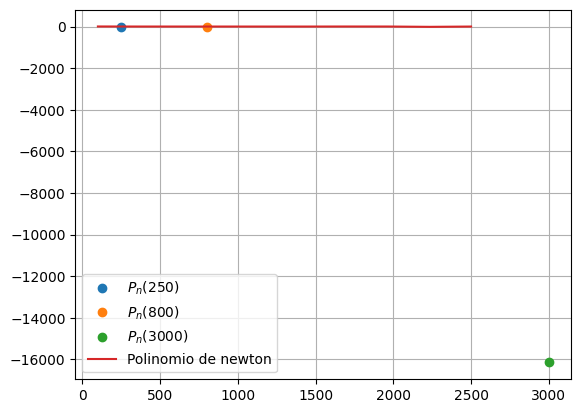

In [49]:
#Primera parte
Pn_2 = Polinomio_Newton(T, rho)
Temperatura = [250, 800, 3000] #K

for p in Temperatura:
  Pn2 = Polinomio_Newton(T, rho)
  Pn2_eval = Pn2(p)
  print(f'Cuando la temperatura es {p} K, la densidad del aire es igual a {Pn2_eval}')
  plt.plot(p, Pn2_eval, 'o', label = f'$P_n({p})$')

#Segunda parte
T_interp = np.linspace(100, 2500, 10) #K
p_interp = [Pn_2(T_) for T_ in T_interp]
plt.plot(T_interp, p_interp, label = 'Polinomio de newton')
plt.legend()
plt.grid()

Por el valor de $P_n(T)$ cuando $T = 3000 K$, la gráfica no tiene una forma en la cual se logre apreciar la curvatura, sin embargo debajo de este texto haremos una gráfica donde solo consideremos T = [250, 800], además para suavizar un poco la curva, haremos la comparación con intervalos distintos para el T_interp

<ipython-input-24-2465633046>:48: RuntimeWarning: overflow encountered in scalar multiply
  producto *= (x_val - x[i - 1])


Cuando la temperatura es 250 K, la densidad del aire es igual a 1.40 kg/m^3
Cuando la temperatura es 800 K, la densidad del aire es igual a 0.52 kg/m^3


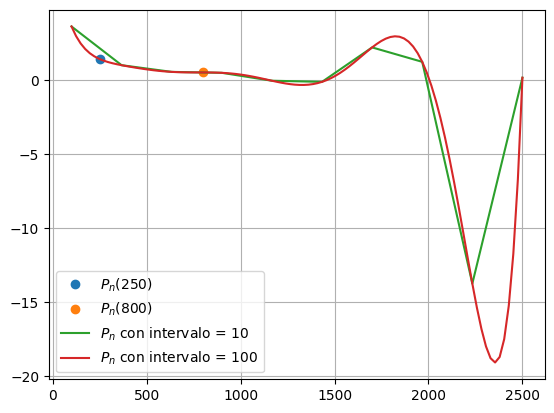

In [71]:
#Primera parte
Pn_2 = Polinomio_Newton(T, rho)
Temperatura = [250, 800] #K
for p in Temperatura:
  Pn2_eval = Pn_2(p)
  print(f'Cuando la temperatura es {p} K, la densidad del aire es igual a {Pn2_eval:.2f} kg/m^3')
  plt.plot(p, Pn2_eval, 'o', label = f'$P_n({p})$')
Intervalo = [10, 100]
#Segunda parte
for I in Intervalo:
  T_interp = np.linspace(100, 2500, I) #K
  p_interp = [Pn_2(T_) for T_ in T_interp]
  plt.plot(T_interp, p_interp, label = f'$P_n$ con intervalo = {I}')
plt.legend()
plt.grid()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

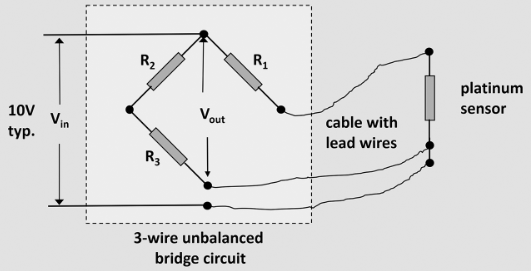



[texto del enlace](https://)
A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [72]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

In [73]:
interp_voltaje = CubicSpline(resistencia, voltaje)

V_est_100C = interp_voltaje(139.27)
print(f"Voltaje estimado a 100 °C (R = 139.27 Ω): {V_est_100C:.5f} V")

Voltaje estimado a 100 °C (R = 139.27 Ω): -0.37015 V


Text(0, 0.5, 'Voltaje')

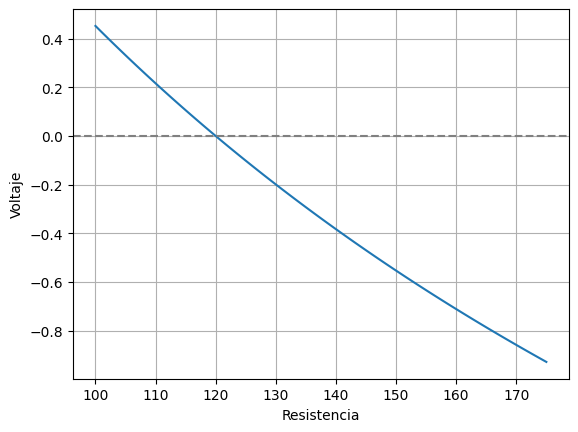

In [87]:
#Veamos por cuál intervalo está la raíz
res_interp = np.linspace(min(resistencia), max(resistencia), 100)
interp_vol = interp_voltaje(res_interp)
plt.plot(res_interp, interp_vol)
plt.grid()
plt.axhline(y = 0, color = 'grey', linestyle = '--')
plt.xlabel('Resistencia')
plt.ylabel('Voltaje')

- Vemos que está aproximadamente en resistencia = 120, vamos a comprobarlo.

- Además vemos como a mayor resistencia menor voltaje.

In [90]:
def f_res(R):
  return interp_voltaje(R)

sol = newton(f_res, x0 = 115, x1 = 125)
print(f'Cuando el voltaje = 0, la resistencia = {sol:.0f}')

Cuando el voltaje = 0, la resistencia = 120


## Conclusiones

- Sabemos que a $100\, \Omega$ la temperatura = $0°$ C y que a $139.27\, \Omega$ la temperatura es de $100°$ C.

- Además sabemos que la resistencia del alambre cambia de manera muy lineal con la temperatura.

- Por tanto podemos predecir que a $120\, \Omega$ la temperatura es igual a $50°$.



# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [22]:
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

In [23]:
refracción_interp = np.linspace(min(indice_refraccion), max(indice_refraccion), 100)

Pol_CS = CubicSpline(indice_refraccion, lambda_angstrom)
Point_to_eval = Pol_CS(1.520)

print(f'La longitud de onda cuando el índice de refracción es 1.520, es: {Point_to_eval}')

La longitud de onda cuando el índice de refracción es 1.520, es: 4482.265120487942
